### Loading the Dataset

In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/Shamsvi/CMSE-830/main/CrimesOnWomenData.csv'

# Attempting to load the CSV file from the raw GitHub link
try:
    data = pd.read_csv(url)
    print("Data loaded successfully:")
    print(data.head())
except pd.errors.ParserError as e:
    print("ParserError occurred:", e)
except Exception as e:
    print("An error occurred:", e)


Data loaded successfully:
   Unnamed: 0              State  Year  Rape   K&A   DD   AoW   AoM    DV  WT
0           0     ANDHRA PRADESH  2001   871   765  420  3544  2271  5791   7
1           1  ARUNACHAL PRADESH  2001    33    55    0    78     3    11   0
2           2              ASSAM  2001   817  1070   59   850     4  1248   0
3           3              BIHAR  2001   888   518  859   562    21  1558  83
4           4       CHHATTISGARH  2001   959   171   70  1763   161   840   0


### Data Collection and Preparation

In [5]:
# Checking for missing values
missing_values = data.isnull().sum()

# Checking for duplicate rows
duplicates = data.duplicated().sum()

# Data types of the columns
data_types = data.dtypes

missing_values, duplicates, data_types


(Unnamed: 0    0
 State         0
 Year          0
 Rape          0
 K&A           0
 DD            0
 AoW           0
 AoM           0
 DV            0
 WT            0
 dtype: int64,
 0,
 Unnamed: 0     int64
 State         object
 Year           int64
 Rape           int64
 K&A            int64
 DD             int64
 AoW            int64
 AoM            int64
 DV             int64
 WT             int64
 dtype: object)

In [7]:
# Step 1: Dropping unnecessary 'Unnamed: 0' column
data_cleaned = data.drop(columns=['Unnamed: 0'])

# Step 2: Checking for missing values
missing_values = data_cleaned.isnull().sum()

# Step 3: Checking for duplicate rows and removing them
duplicates = data_cleaned.duplicated().sum()
data_cleaned = data_cleaned.drop_duplicates()

# Step 4: Ensuring correct data types (converting Year to integer if necessary)
data_cleaned['Year'] = data_cleaned['Year'].astype(int)

# Display the results
missing_values, duplicates, data_cleaned.dtypes


(State    0
 Year     0
 Rape     0
 K&A      0
 DD       0
 AoW      0
 AoM      0
 DV       0
 WT       0
 dtype: int64,
 0,
 State    object
 Year      int64
 Rape      int64
 K&A       int64
 DD        int64
 AoW       int64
 AoM       int64
 DV        int64
 WT        int64
 dtype: object)

In [9]:
# Applying One-Hot Encoding to the 'State' column
data_encoded = pd.get_dummies(data_cleaned, columns=['State'], drop_first=True)

# Display the first few rows to confirm the changes
print(data_encoded.head())


   Year  Rape   K&A   DD   AoW   AoM    DV  WT  State_A & N Islands  \
0  2001   871   765  420  3544  2271  5791   7                False   
1  2001    33    55    0    78     3    11   0                False   
2  2001   817  1070   59   850     4  1248   0                False   
3  2001   888   518  859   562    21  1558  83                False   
4  2001   959   171   70  1763   161   840   0                False   

   State_ANDHRA PRADESH  ...  State_TRIPURA  State_Tamil Nadu  \
0                  True  ...          False             False   
1                 False  ...          False             False   
2                 False  ...          False             False   
3                 False  ...          False             False   
4                 False  ...          False             False   

   State_Telangana  State_Tripura  State_UTTAR PRADESH  State_UTTARAKHAND  \
0            False          False                False              False   
1            False          

Missing Values:
 Year                   0
Rape                   0
K&A                    0
DD                     0
AoW                    0
                      ..
State_UTTARAKHAND      0
State_Uttar Pradesh    0
State_Uttarakhand      0
State_WEST BENGAL      0
State_West Bengal      0
Length: 77, dtype: int64


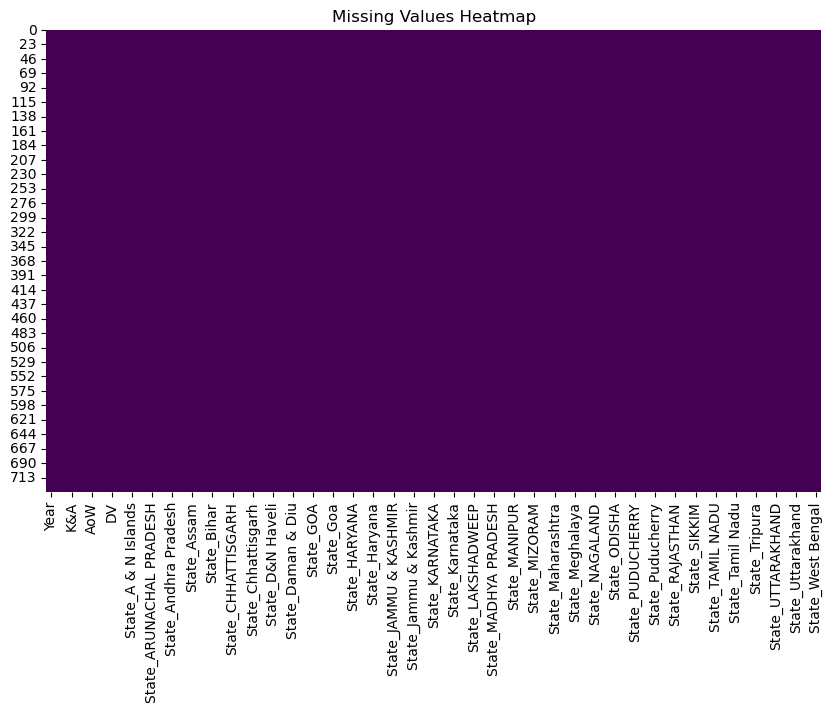

In [11]:
# Check for missing values in the dataset
missing_values = data_encoded.isnull().sum()
print("Missing Values:\n", missing_values)

# Visualize missing data using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(data_encoded.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


In [13]:
# Checking the distribution of each crime type to see if there's any imbalance
crime_counts = data_encoded[['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']].sum()

# Display the counts of each crime type
crime_counts


Rape     535702
K&A      835023
DD       158750
AoW     1162229
AoM      244884
DV      1909978
WT        21156
dtype: int64

In [15]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

# Separate features (X) and target variables (y)
X = data_encoded.drop(columns=['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT'])
y_columns = ['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']

# Initialize a list to store the resampled targets
y_resampled_list = []

# Apply SMOTE for large datasets, RandomOverSampler for smaller ones
for column in y_columns:
    if data_encoded[column].value_counts().min() < 6:  # For small datasets
        sampler = RandomOverSampler(random_state=42)
    else:
        sampler = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5)  # Default SMOTE
    
    X_resampled, y_resampled = sampler.fit_resample(X, data_encoded[column])
    y_resampled_list.append(y_resampled)

# Combine the resampled target columns back into a DataFrame
y_resampled_final = pd.concat(y_resampled_list, axis=1)
y_resampled_final.columns = y_columns  # Reassign column names

# Combine the resampled features (X) with the resampled target columns (y)
resampled_data = pd.concat([X_resampled, y_resampled_final], axis=1)

# Display the first few rows of the resampled data
print(resampled_data.head())


     Year State_A & N Islands State_ANDHRA PRADESH State_ARUNACHAL PRADESH  \
0  2001.0               False                 True                   False   
1  2001.0               False                False                    True   
2  2001.0               False                False                   False   
3  2001.0               False                False                   False   
4  2001.0               False                False                   False   

  State_ASSAM State_Andhra Pradesh State_Arunachal Pradesh State_Assam  \
0       False                False                   False       False   
1       False                False                   False       False   
2        True                False                   False       False   
3       False                False                   False       False   
4       False                False                   False       False   

  State_BIHAR State_Bihar  ... State_Uttarakhand State_WEST BENGAL  \
0       False   

### Initial Data Analysis (IDA)

In [19]:
# Drop duplicates by merging the lowercase and uppercase columns
# This example shows merging and summing duplicate columns for Assam

data_encoded['State_Assam_combined'] = data_encoded[['State_ASSAM', 'State_Assam']].sum(axis=1)

# After merging, drop the original columns
data_encoded = data_encoded.drop(['State_ASSAM', 'State_Assam'], axis=1)

# Repeat this process for all other duplicate columns, or loop over all columns systematically

# Identify columns with duplicated state names
import re

# Create a function to merge duplicate state columns
def merge_duplicate_states(df):
    state_columns = [col for col in df.columns if re.match(r'State_', col)]
    unique_states = set([re.sub(r'State_', '', col).lower() for col in state_columns])
    
    for state in unique_states:
        matching_columns = [col for col in state_columns if re.sub(r'State_', '', col).lower() == state]
        if len(matching_columns) > 1:
            df[f'State_{state}_combined'] = df[matching_columns].sum(axis=1)
            df.drop(matching_columns, axis=1, inplace=True)
    
    return df

# Apply the function to your dataset
data_encoded_clean = merge_duplicate_states(data_encoded)

# Check the cleaned columns
print(data_encoded_clean.columns)


Index(['Year', 'Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT',
       'State_A & N Islands', 'State_D & N HAVELI', 'State_D&N Haveli',
       'State_Delhi UT', 'State_Telangana', 'State_Assam_combined',
       'State_jammu & kashmir_combined', 'State_mizoram_combined',
       'State_sikkim_combined', 'State_rajasthan_combined',
       'State_west bengal_combined', 'State_daman & diu_combined',
       'State_maharashtra_combined', 'State_kerala_combined',
       'State_gujarat_combined', 'State_andhra pradesh_combined',
       'State_chhattisgarh_combined', 'State_goa_combined',
       'State_jharkhand_combined', 'State_nagaland_combined',
       'State_punjab_combined', 'State_madhya pradesh_combined',
       'State_meghalaya_combined', 'State_uttarakhand_combined',
       'State_karnataka_combined', 'State_uttar pradesh_combined',
       'State_puducherry_combined', 'State_bihar_combined',
       'State_tripura_combined', 'State_himachal pradesh_combined',
       'State_chandigarh_comb

In [ ]:
import pandas as pd

# Combine all state columns into a single 'State' column
state_columns = [col for col in data_encoded.columns if 'State_' in col]

# Create a new 'State' column based on the non-null entries in the one-hot encoded columns
data_encoded['State'] = data_encoded[state_columns].idxmax(axis=1).str.replace('State_', '')

# Drop the old one-hot encoded state columns
data_encoded.drop(columns=state_columns, inplace=True)

# Display the new dataset to verify the 'State' column
print(data_encoded[['State', 'Year', 'Rape', 'K&A', 'DD']].head())


In [ ]:
print(data_encoded.columns)

In [ ]:
# Summary statistics
summary_statistics = data_encoded.describe()
print("Summary Statistics:\n", summary_statistics)

# Check for outliers using boxplots
plt.figure(figsize=(10,6))
data_encoded.drop(columns=['State', 'Year']).boxplot()
plt.title("Boxplot of Crime Data")
plt.show()


### Exploratory Data Analysis (EDA)

In [ ]:
from sklearn.preprocessing import LabelEncoder


# Convert 'State' column to categorical if it's not already

# Label Encoding for 'State' column
label_encoder = LabelEncoder()
data_encoded['State_encoded'] = label_encoder.fit_transform(data_encoded['State'])

# Display the first few rows to verify
print(data_encoded[['State', 'State_encoded']].head())


In [ ]:
# Plot histograms for each crime type
data_encoded.drop(columns=['State', 'Year']).hist(figsize=(10, 10), bins=30)
plt.suptitle("Distribution of Crimes Against Women")
plt.show()


In [ ]:
# Correlation heatmap
correlation_matrix = data_encoded.drop(columns=['State', 'Year']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Crime Types")
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Group by year and calculate the sum of numeric columns only
yearly_trends = data_encoded.groupby('Year').sum(numeric_only=True)

# Line chart for crime trends over the years
plt.figure(figsize=(12, 8))
yearly_trends.plot(kind='line')
plt.title("Crime Trends Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Crimes")
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Plot total crimes over the years
plt.figure(figsize=(10, 6))
data.groupby('Year')['Rape'].sum().plot(kind='line', marker='o', color='r', label='Rape Cases')
data.groupby('Year')['DV'].sum().plot(kind='line', marker='x', color='b', label='Domestic Violence Cases')
plt.title('Crimes Against Women Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()


In [ ]:
# Standardize the state names in the crime dataset to match the shapefile
data['State'] = data['State'].replace({
    'JAMMU & KASHMIR': 'Jammu and Kashmir',  
    'Jammu & Kashmir': 'Jammu and Kashmir',  
    'A & N Islands': 'Andaman and Nicobar',
    'D & N HAVELI': 'Dadra and Nagar Haveli',
    'D&N Haveli': 'Dadra and Nagar Haveli',
    'DAMAN & DIU': 'Daman and Diu',
    'Daman & Diu': 'Daman and Diu',
    'Delhi UT': 'NCT of Delhi',
    'ODISHA': 'Odisha', 
    'ANDHRA PRADESH': 'Andhra Pradesh',
    'ARUNACHAL PRADESH': 'Arunachal Pradesh',
    'ASSAM': 'Assam',
    'BIHAR': 'Bihar',
    'CHHATTISGARH': 'Chhattisgarh',
    'GOA': 'Goa',
    'GUJARAT': 'Gujarat',
    'HARYANA': 'Haryana',
    'HIMACHAL PRADESH': 'Himachal Pradesh',
    'JHARKHAND': 'Jharkhand',
    'KARNATAKA': 'Karnataka',
    'KERALA': 'Kerala',
    'MADHYA PRADESH': 'Madhya Pradesh',
    'MAHARASHTRA': 'Maharashtra',
    'MANIPUR': 'Manipur',
    'MEGHALAYA': 'Meghalaya',
    'MIZORAM': 'Mizoram',
    'NAGALAND': 'Nagaland',
    'PUNJAB': 'Punjab',
    'RAJASTHAN': 'Rajasthan',
    'SIKKIM': 'Sikkim',
    'TAMIL NADU': 'Tamil Nadu',
    'TRIPURA': 'Tripura',
    'UTTAR PRADESH': 'Uttar Pradesh',
    'UTTARAKHAND': 'Uttarakhand',
    'WEST BENGAL': 'West Bengal',
    'LAKSHADWEEP': 'Lakshadweep',
    'PUDUCHERRY': 'Puducherry',
})

# Verify the updated state names
print(data['State'].unique())


In [ ]:
import requests
import zipfile
import os

# URL of the GitHub ZIP file
url = 'https://github.com/Shamsvi/CMSE-830/archive/refs/heads/main.zip'

# Download the file
zip_path = 'gadm41_IND_shp.zip'
with open(zip_path, 'wb') as f:
    f.write(requests.get(url).content)

# Extract the downloaded ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('gadm41_IND_shp')


In [ ]:
import requests, zipfile, io
import geopandas as gpd
import plotly.express as px
import pandas as pd

# Step 1: Download the ZIP file from GitHub (shapefile)
url = 'https://github.com/Shamsvi/CMSE-830/archive/refs/heads/main.zip'

# Download the ZIP file
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("gadm41_IND_shp")

# Step 2: Load the shapefile using Geopandas
shapefile_path = 'gadm41_IND_shp/CMSE-830-main/gadm41_IND_shp/gadm41_IND_1.shp'
india_states = gpd.read_file(shapefile_path)

# Step 3: Load the crime dataset from the provided URL
url = 'https://raw.githubusercontent.com/Shamsvi/CMSE-830/main/CrimesOnWomenData.csv'
data = pd.read_csv(url)

# Step 4: Aggregate the crime data for all years
crime_columns = ['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']  # Adjust based on actual column names
aggregated_data = data.groupby('State')[crime_columns].sum().reset_index()

# Step 5: Merge the aggregated crime data with the shapefile
merged_data = india_states.merge(aggregated_data, how='left', left_on='NAME_1', right_on='State')

# Step 6: Create GeoJSON for Plotly
geojson_data = merged_data.__geo_interface__

# Step 7: Create an interactive map for one of the crimes (e.g., 'Rape')
fig = px.choropleth_mapbox(
    merged_data,
    geojson=geojson_data,
    locations='NAME_1',  # Column in merged_data for state names
    featureidkey="properties.NAME_1",  # Key for matching the GeoJSON
    color='Rape',  # Change this to the column you want to visualize ('Rape', 'K&A', etc.)
    color_continuous_scale="OrRd",
    mapbox_style="carto-positron",
    zoom=3.5,
    center={"lat": 20.5937, "lon": 78.9629},  # Center the map on India
    title="Crime Cases Across Indian States"
)

# Step 8: Update layout for better aesthetics
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Display the interactive plot
fig.show()
